# Expectations

## On scale

+ Given the parameters, constants, the period profit is around 2.2. Given that δ = 0.95, the value function should then be

$$ {2.2 \over (1- δ)} \approx 44$$

## On elasticities

+ As product becomes more inelastic, profit goes down. while prices go up
+ As product becomes more elastic, profit goes up, while prices go down

## On variance

+ With a risk neutral firm, it's not clear that a higher variance would reduce value
+ Higher variance should imply more variation in prices over time. Optimal price should vary with variance (fixing expected elasticity)


In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import dill
import numpy as np
import pandas as pd
file_n = "2019-4-12medium_prod_vfi_dict.dill"  
with open('../data/' + file_n, 'rb') as file:
    data_d = dill.load(file)

import sys
sys.path.append('../')
import src

lambdas = src.generate_simplex_3dims(n_per_dim=data_d['n_of_lambdas_per_dim'])
price_grid = np.linspace(data_d['min_price'], data_d['max_price'])

policy = data_d['policy']
valueF = data_d['valueF']

lambdas_ext = src.generate_simplex_3dims(n_per_dim=30)
lambdas_ext.shape

(465, 3)

In [16]:
from src import const
from typing import Callable

def period_profit(p: np.ndarray, lambdas: np.ndarray,
                  betas_transition=const.betas_transition):
    """
    Correct expected period return profit. See ReadMe for derivation

    p: level prices, NOT log
    """
    constant_part = (p-const.c) * np.e ** const.α * np.e ** ((const.σ_ɛ ** 2) / 2)
    summation = np.dot(np.e**(betas_transition*np.log(p[:, np.newaxis])), lambdas)

    return constant_part*summation


def myopic_price(lambdas: np.ndarray, betas_transition=const.betas_transition):
    """
    Given a lambda point, spits out optimal myopic price
    """
    #Elasticity implied by lambdas
    elasticity = np.dot(lambdas, betas_transition) #-2.2
    assert (elasticity < -1.0).all()
    return const.c / (1 + (1/elasticity))

def v0(lambdas_except_last: np.ndarray) -> Callable:
    """

    :param lambdas_except_last: D-1, then augmented
    :return:
    """
    full_lambdas = np.array(list(lambdas_except_last) + [1 - lambdas_except_last.sum()])
    optimal_price: float = myopic_price(full_lambdas)

    #Dirty trick because period_profit takes a vector price, not scalar
    prices = np.array([optimal_price, optimal_price+0.01])
    return period_profit(prices, full_lambdas)[0]

med_lambda = np.array([0., 0.1])

v0(med_lambda)

2.896051097787312

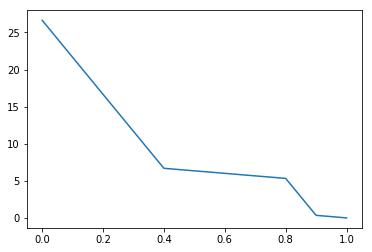

In [21]:
#Numbers taken from aguirragabiria_julia.ipynb

#Lambda1 become more relevant: which means demand becomes more elastic
#As product becomes more elastic, profit goes up
lambdas_selected = np.array([[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]])


valuef_values = valueF(lambdas_selected[:, 0:2])

fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0, 1, num=11), valuef_values)

# Plot goes UP!

## Analyze Value function as lambdas change value

Betas are given by : [-3. , -2.5, -2. ]

+ Thus, the first lambda is associated with -3 (more elastic)
+ The third one is associated with -2 (less elastic, more inelastic)

Text(0.5,1,'Value function as the first lambda goes from 0 to 1\n                \n (Demand becomes more elastic)\n                ')

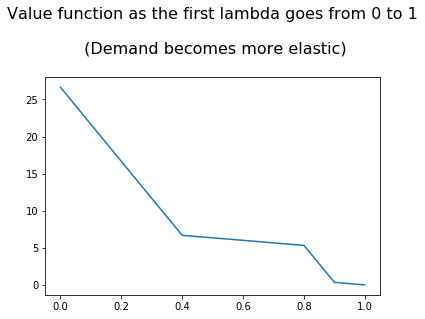

In [22]:
lambdas_selected = np.array([[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]])


lambda1 = lambdas_selected[:, 0]
valuef_values = valueF(lambdas_selected[:, 0:2])

fig, ax = plt.subplots(1, 1)
ax.plot(lambda1, valuef_values)
ax.set_title("""Value function as the first lambda goes from 0 to 1
                \n (Demand becomes more elastic)
                """, size=16)

Text(0.5,1,'Value function as the second lambda goes from 0 to 1\n                \n (Demand becomes more inelastic)\n                ')

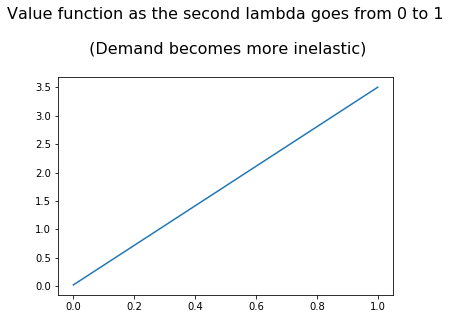

In [23]:
lambdas_selected2 = np.array([[1., 0.],
                            [0.9, 0.1],
                            [0.8, 0.2],
                            [0.7, 0.3],
                            [0.6, 0.4],
                             [0.5, 0.5],
                             [0.4, 0.6],
                             [0.3, 0.7],
                             [0.2, 0.8],
                             [0.1, 0.9],
                             [0., 1.]
                            ])

lambda2 = lambdas_selected2[:, 1]
valuef_values = valueF(lambdas_selected2)

fig, ax = plt.subplots(1, 1)
ax.plot(lambda2, valuef_values)
ax.set_title("""Value function as the second lambda goes from 0 to 1
                \n (Demand becomes more inelastic)
                """, size=16)

## Analysis for myopic price and period profit

In [24]:
from src import const

def period_profit(p, lambdas, betas_transition=const.betas_transition):
    """
    Not the right expected profit (expected value doesn't make epsilon go away)
    but it should be close enough
    """
    E_β = src.exp_b_from_lambdas(lambdas, betas_transition)
    logq = const.α + E_β*np.log(p)
    return (p-const.c)*np.e**logq

def myopic_price(lambdas: np.ndarray, betas_transition=const.betas_transition):
    """
    Given a lambda point, spits out optimal myopic price
    """
    #Elasticity implied by lambdas
    elasticity = np.dot(lambdas, betas_transition) #-2.2
    assert (elasticity < -1.0).all()
    return const.c / (1 + (1/elasticity))

def optimized_period_profit(lambdas):
    opt_p = myopic_price(lambdas)
    E_β = src.exp_b_from_lambdas(lambdas, const.betas_transition)
    logq = const.α + E_β*np.log(opt_p)

    return (opt_p-const.c)*np.e**logq

Text(0.5,1,'Optimized period profit as lambda 1 goes from 0 to 1')

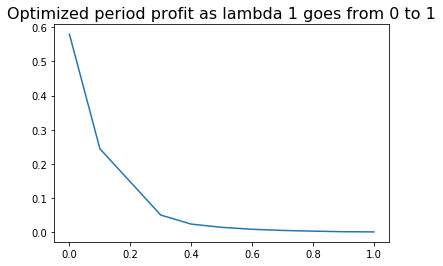

In [25]:
lambdas_selected_3d = np.array([[0., 0.5, 0.5],
                            [0.1, 0.5, 0.4],
                            [0.2, 0.5, 0.2],
                            [0.3, 0.5, 0.2],
                            [0.4, 0.5, 0.1],
                             [0.5, 0.4, 0.1],
                             [0.6, 0.3, 0.1],
                             [0.7, 0.2, 0.1],
                             [0.8, 0.1, 0.1],
                             [0.9, 0.1, 0.],
                             [1., 0., 0.]
                            ])

lambda1 = lambdas_selected_3d[:, 0]
profit_values = optimized_period_profit(lambdas_selected_3d)

fig, ax = plt.subplots(1, 1)
ax.plot(lambda1, profit_values)
ax.set_title("Optimized period profit as lambda 1 goes from 0 to 1", size=16)
#from -2.2 to -3: As product becomes more elastic, prices go down. Profit goes up?

In [20]:
E_β = src.exp_b_from_lambdas(lambdas_selected_3d, const.betas_transition)

In [75]:
E_β

array([-2.25, -2.35, -2.25, -2.55, -2.65, -2.7 , -2.75, -2.8 , -2.85,
       -2.95, -3.  ])

In [76]:
const.betas_transition

array([-3. , -2.5, -2. ])

Text(0.5,1,'\nPrices over lambda1\n\n\n(as demand becomes more elastic)\n')

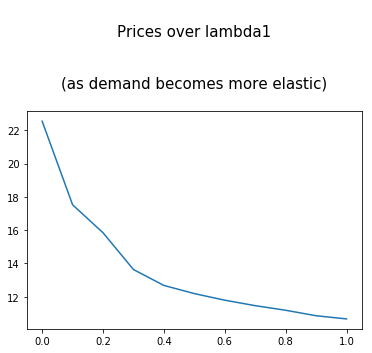

In [26]:
# Price goes down from  -2.2 to -3 (as product becomes more elastic)

lambda1 = lambdas_selected_3d[:, 0]
prices = myopic_price(lambdas_selected_3d, const.betas_transition)
fig, ax = plt.subplots(1, 1)
ax.plot(lambda1, prices)

ax.set_title("""
Prices over lambda1
\n
(as demand becomes more elastic)
""", size=15)

## Mathematical formulas for optimized price and profit

In [59]:
from sympy import *
init_printing(use_unicode=True)

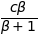

In [119]:
p, c, α, β = symbols('p c α β', real=True)

logq = α + β*log(p)
q = exp(logq)
profit = (p-c)*q

optimal_price = solve(simplify(diff(profit, p)), p)[0]
optimal_price

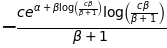

In [124]:
optimized_profit = (optimal_price - c)*exp(α + β*log(optimal_price))
simplify(diff(optimized_profit, β))

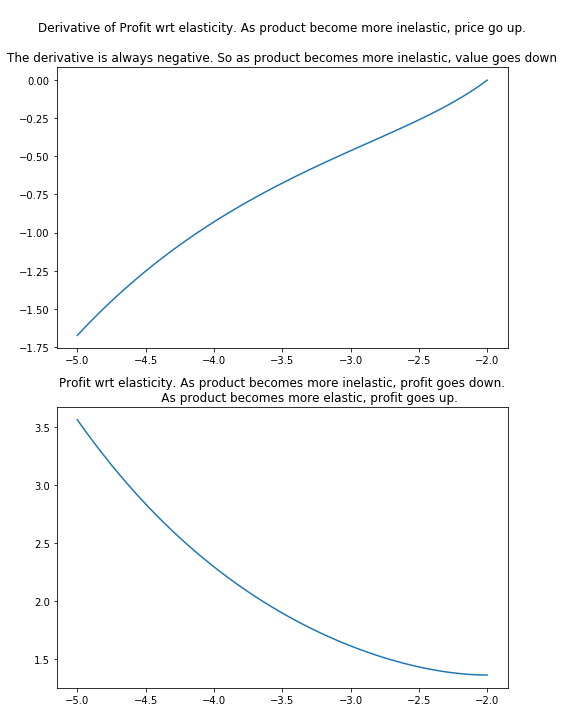

In [136]:

def optimized_period_profit_over_elasticities(elasticities):
    opt_p = const.c*elasticities /(elasticities+1)
    logq = const.α + elasticities*np.log(opt_p)

    return (opt_p-const.c)*np.e**logq

def deriv_opt_profit_wrt_beta(β, α=1, c=0.5):
    num1 = c*np.exp(α + β*np.log( c*β /(β+1)  ))
    num2 = np.log(c*β /(β+1))
    num = num1*num2
    den = β + 1
    return -num/den

elasticities = np.linspace(-2.0, -5.0)
derivatives = deriv_opt_profit_wrt_beta(elasticities)
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(8, 10))
ax1.plot(elasticities, derivatives)
ax1.set_title("""
Derivative of Profit wrt elasticity. As product become more inelastic, price go up.\n
The derivative is always negative. So as product becomes more inelastic, value goes down""")


profits = optimized_period_profit_over_elasticities(elasticities)
ax2.plot(elasticities, profits)
ax2.set_title("""Profit wrt elasticity. As product becomes more inelastic, profit goes down.
              As product becomes more elastic, profit goes up.""")

fig.tight_layout()

In [ ]:
profit2 = (p-c)*exp(log(q))
mr = diff(profit, )

In [94]:
def price_over_elast(elasticity):
    return const.c / (1 + (1/elasticity))

Text(0.5,1,'Prices. As product become more inelastic, price go up')

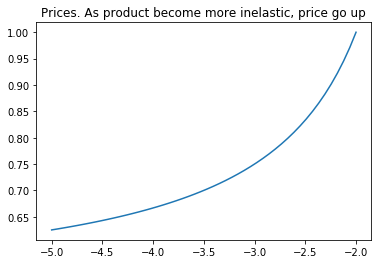

In [117]:
elasticities = np.linspace(-2.0, -5.0)
prices = price_over_elast(elasticities)
fig, ax = plt.subplots(1, 1)
ax.plot(elasticities, prices)
ax.set_title("""
Prices. As product become more inelastic, price go up.\n
As product becomes more elastic, prices go down""")